In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df = pd.read_csv('/content/Football Player Stats.csv')

In [6]:
df.head()

,Name,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control
0,Lionel Messi,429,85,95,70,91,88,470,96,93,94,91,96
1,C. Ronaldo dos Santos Aveiro,437,84,95,90,82,86,414,88,81,76,77,92
2,Jan Oblak,95,13,11,15,43,13,109,12,13,14,40,30
3,Kevin De Bruyne,407,94,82,55,94,82,441,88,85,83,93,92
4,Neymar da Silva Santos Jr.,408,85,87,62,87,87,448,95,88,89,81,95


In [7]:
df.tail()

,Name,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control
18974,Ao Xia,145,23,26,43,26,27,142,27,23,21,29,42
18975,Ben Hough,211,38,42,40,56,35,219,46,40,35,50,48
18976,Ronan McKinley,200,30,34,43,54,39,207,43,39,31,47,47
18977,Zhen'ao Wang,215,45,52,34,42,42,194,51,35,31,31,46
18978,Xiao Zhou,163,40,18,40,45,20,171,40,33,20,40,38


In [9]:
X = df[['Finishing']]
y = df['Attacking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
Finishing = int(input("Enter the finishing stat of the player: "))
input_data = pd.DataFrame({'Finishing': [Finishing]})
predicted_attacking = model.predict([[Finishing]])
print("Predicted Attacking Stat of the player:", predicted_attacking[0])


Mean Squared Error: 1091.9354980433725
Coefficients: [3.3654834]
Intercept: 94.7760249541434
Enter the finishing stat of the player: 86
Predicted Attacking Stat of the player: 384.20759732457117


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


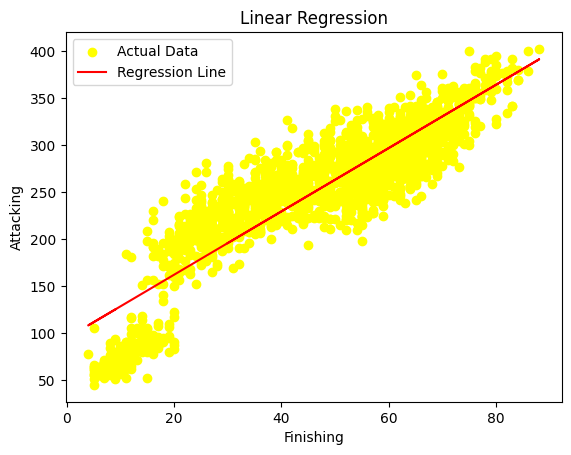

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='yellow', label='Actual Data')
plt.plot(X_test, model.predict(X_test), color='red', label='Regression Line')
plt.xlabel('Finishing')
plt.ylabel('Attacking')
plt.title('Linear Regression')
plt.legend()
plt.show()

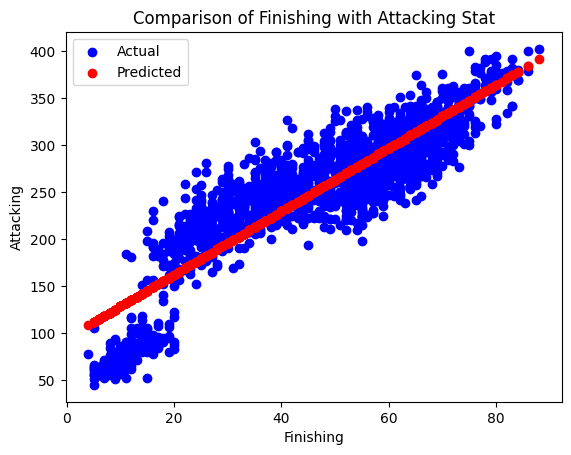

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Finishing')
plt.ylabel('Attacking')
plt.title('Comparison of Finishing with Attacking Stat')
plt.legend()
plt.show()


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv('/content/Football Player Stats.csv')
features = ['Heading Accuracy', 'Short Passing','Long Passing', 'Skill','Dribbling', 'Curve', 'Volleys', 'Ball Control', 'Crossing', 'FK Accuracy']
X = df[features]
y = df['Attacking']
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 55.75176285772189
Coefficients: [ 0.95757726  0.94908874 -0.25571968  0.09189628  0.33864662 -0.07271081
  1.6523605   0.09534831  0.83686021 -0.01366816]
Intercept: 0.802248641821194


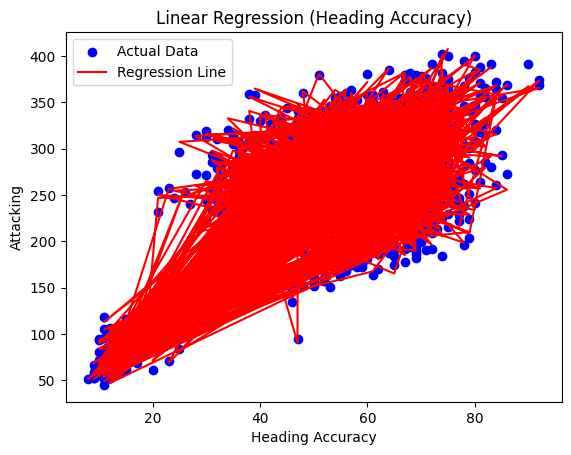

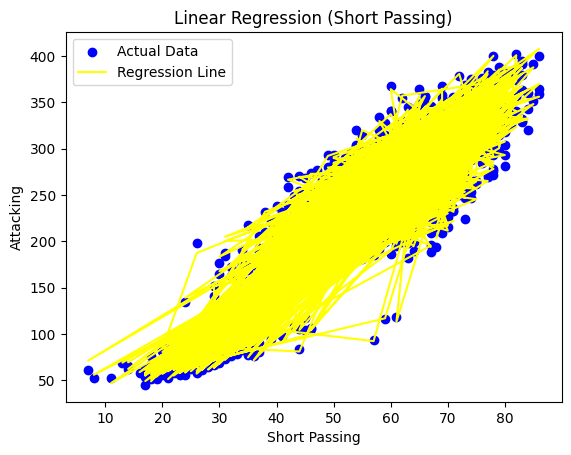

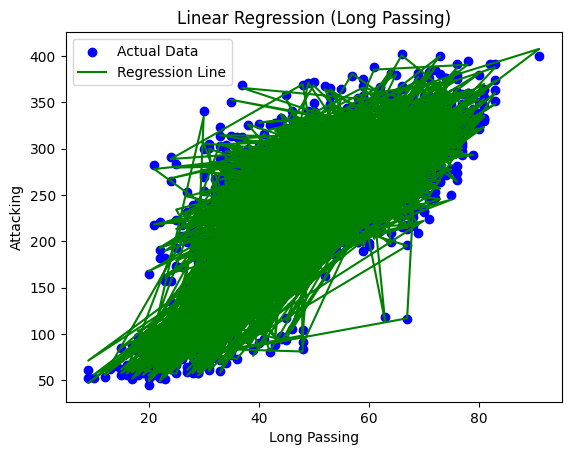

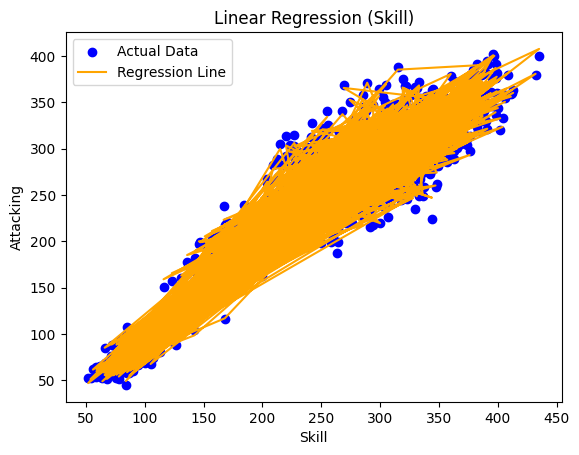

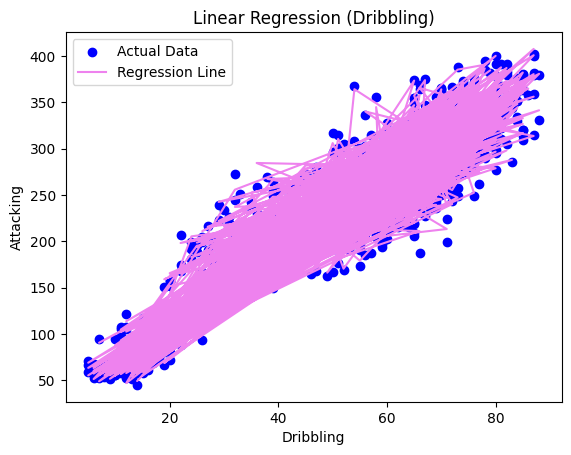

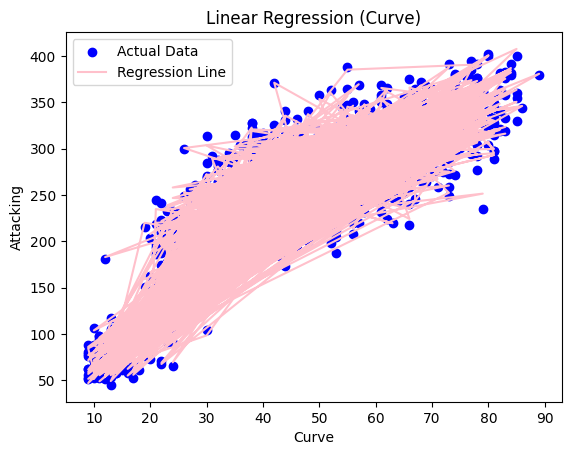

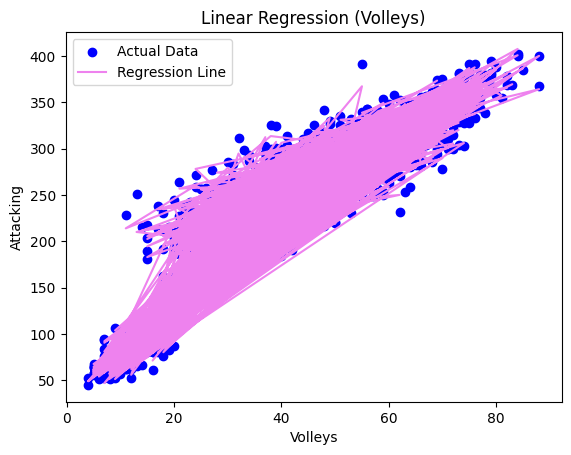

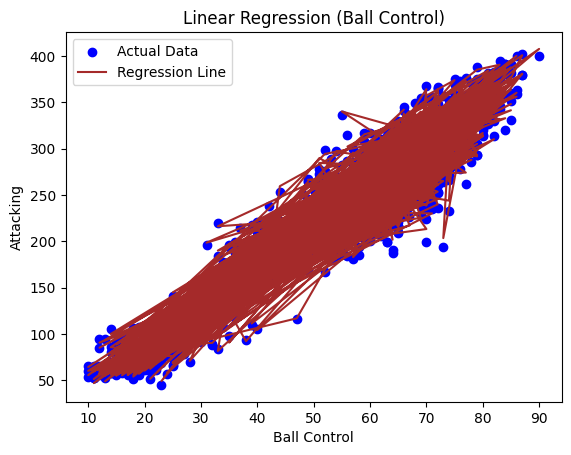

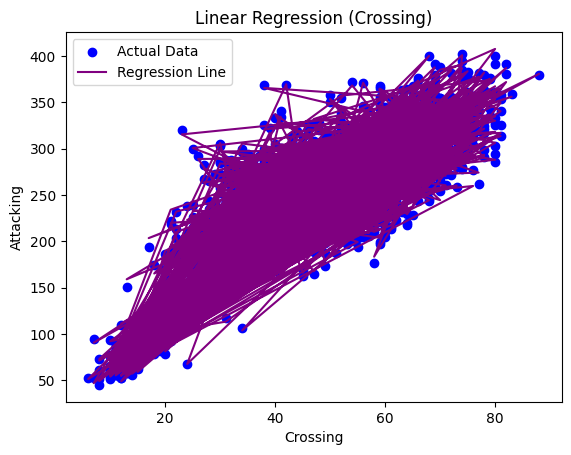

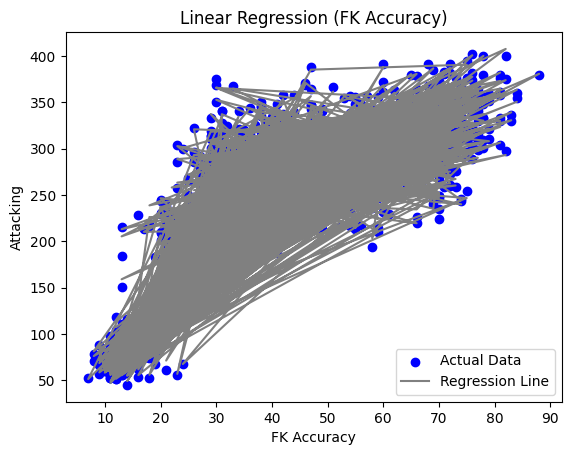

In [20]:
features = ['Heading Accuracy', 'Short Passing', 'Long Passing', 'Skill', 'Dribbling', 'Curve', 'Volleys', 'Ball Control', 'Crossing', 'FK Accuracy']
colors = ['red', 'yellow', 'green', 'orange', 'violet', 'pink', 'violet', 'brown', 'purple', 'grey']

for i in range(len(features)):
    plt.scatter(X_test[:, i], y_test, color='blue', label='Actual Data')
    plt.plot(X_test[:, i], model.predict(X_test), color=colors[i], label='Regression Line')
    plt.xlabel(features[i])
    plt.ylabel('Attacking')
    plt.title(f'Linear Regression ({features[i]})')
    plt.legend()
    plt.show()


In [22]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ',
np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error : ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error :  5.745965976217292
Mean Squared Error :  55.75176285772189
Root Mean Squared Error :  7.466710310285373
R Squared Error :  0.9893782828566651


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

df = pd.read_csv('/content/Football Player Stats.csv')
features = ['Heading Accuracy', 'Short Passing', 'Long Passing', 'Skill','Dribbling', 'Curve', 'Volleys', 'Ball Control', 'Crossing', 'FK Accuracy']
X = df[features]
y = df['Attacking']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print ('The range of heading accuracy is between 5 to 93')
Heading_Accuracy = int(input("Enter the heading accuracy: "))

print ('The range of short passing is between 7 to 94')
Short_Passing = int(input("Enter the short passing: "))

print ('The range of long passing is between 5 to 93')
Long_Passing = int(input("Enter the long passing: "))

print ('The range of skill is between 40 to 470')
Skill = int(input("Enter the skill: "))

print ('The range of dribbling is between 5 to 96')
Dribbling = int(input("Enter the dribbling: "))

print ('The range of curve is between 4 to 94')
Curve = int(input("Enter the curve: "))

print ('The range of volleys is between 3 to 90')
Volleys = int(input("Enter the volleys: "))

print ('The range of ball control is between 5 to 96')
Ball_Control = int(input("Enter the ball control: "))

print ('The range of crossing is between 6 to 94')
Crossing = int(input("Enter the crossing: "))

print ('The range of free-kick accuracy is between 5 to 94')
FK_Accuracy = int(input("Enter the free-kick accuracy: "))

input_data = pd.DataFrame({'Heading_Accuracy': [Heading_Accuracy], 'Short_Passing': [Short_Passing],
                           'Long_Passing': [Long_Passing], 'Skill': [Skill],
                           'Dribbling': [Dribbling], 'Curve': [Curve],
                           'Volleys': [Volleys], 'Ball_Control': [Ball_Control],
                           'Crossing': [Crossing], 'FK_Accuracy': [FK_Accuracy]})
predicted_attacking = model.predict(input_data)
print('The range of attacking is 40 to 460')
print("Predicted Attacking:", predicted_attacking[0])

The range of heading accuracy is between 5 to 93
Enter the heading accuracy: 57
The range of short passing is between 7 to 94
Enter the short passing: 76
The range of long passing is between 5 to 93
Enter the long passing: 91
The range of skill is between 40 to 470
Enter the skill: 355
The range of dribbling is between 5 to 96
Enter the dribbling: 80
The range of curve is between 4 to 94
Enter the curve: 70
The range of volleys is between 3 to 90
Enter the volleys: 34
The range of ball control is between 5 to 96
Enter the ball control: 79
The range of crossing is between 6 to 94
Enter the crossing: 84
The range of free-kick accuracy is between 5 to 94
Enter the free-kick accuracy: 47
The range of attacking is 40 to 460
Predicted Attacking: 292.4809179746837


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [29]:
accuracy = model.score(X_test, y_test)
print("Accuracy (R-squared):", accuracy)
print("Accuracy (Percentage): {:.2f}%".format(accuracy * 100))
X = df[['Finishing']]
y = df['Attacking']
x_mean=np.mean(X['Finishing']) # Calculate mean of the 'features' column
y_mean=np.mean(y)

Accuracy (R-squared): 0.9892924673600899
Accuracy (Percentage): 98.93%
